In [460]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import ast
from mplsoccer.pitch import Pitch
from collections import Counter, defaultdict

%matplotlib inline

In [2]:
data = pd.read_csv('../app/data/events.csv')

In [19]:
for c in data.columns:
    print(f"{c:33} {sum(data[c].isna()) / data.shape[0]:10.2%} {len(data[c].unique()):5} {data[c].unique()[:5] if len(data[c].unique()) < 5 else ''}")

ball_receipt_outcome                  96.67%     2 [nan 'Incomplete']
ball_recovery_recovery_failure        99.92%     2 [nan True]
block_deflection                      99.97%     2 [nan True]
carry_end_location                    76.32%   939 
clearance_aerial_won                  99.92%     2 [nan True]
clearance_body_part                   99.37%     4 [nan 'Left Foot' 'Head' 'Right Foot']
clearance_head                        99.70%     2 [nan True]
clearance_left_foot                   99.87%     2 [nan True]
clearance_right_foot                  99.80%     2 [nan True]
counterpress                          97.40%     2 [nan True]
dribble_nutmeg                        99.95%     2 [nan True]
dribble_outcome                       99.47%     3 [nan 'Incomplete' 'Complete']
dribble_overrun                       99.97%     2 [nan True]
duel_outcome                          99.12%     5 
duel_type                             98.61%     3 [nan 'Tackle' 'Aerial Lost']
duration          

In [5]:
data

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3412, 'lineup': [{'player': {'id...",Netherlands,941,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Ukraine,911,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,NaN,NaN,NaN,"[31.8, 36.1]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:02.596,Carry,NaN
3965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:03.684,Pass,NaN
3966,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:04.284,Ball Receipt*,NaN
3967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:04.681,Half End,NaN


In [23]:
data.possession.sum() / 60 / 60

91.41333333333334

In [146]:
data.groupby('team')['possession'].sum() / data.possession.sum()

team
Netherlands    0.613532
Ukraine        0.386468
Name: possession, dtype: float64

In [152]:
aaa = data.groupby('team').agg({'possession': "sum"})

In [159]:
aaa

,possession
team,
Netherlands,201906
Ukraine,127182


In [155]:
aaa.rename(columns={'possession': 'Possession'})

,Possession
team,
Netherlands,201906
Ukraine,127182


In [130]:
data[data.type == 'Pass'].groupby('team').agg('count')

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team_id,timestamp,type,under_pressure
team,,,,,,,,,,,,,,,,,,,,,
Netherlands,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,705,705,705,82
Ukraine,0,0,0,0,0,0,0,0,0,6,...,0,0,0,0,0,0,449,449,449,106


In [138]:
data[data.type == 'Pass']

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.227,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:00.292,Pass,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:01.330,Pass,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:02.287,Pass,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:03.806,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:52.379,Pass,NaN
3955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:57.239,Pass,True
3959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:59.365,Pass,True
3961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:00.527,Pass,True


team     foul_committed_card
Ukraine  Yellow Card            1
Name: id, dtype: int64

In [144]:
data.foul_won_defensive.value_counts()

foul_won_defensive
True    4
Name: count, dtype: int64

In [145]:
data.foul_won_advantage.value_counts()

foul_won_advantage
True    2
Name: count, dtype: int64

In [ ]:
data.foul_won_advantage.value_counts()

In [177]:
bbb = data.pivot_table(
    values=['id'],
    index=['team'],
    columns=['foul_committed_card'],
    aggfunc='count', fill_value=0
)
bbb.columns = bbb.columns.droplevel()

In [178]:
bbb

foul_committed_card,Yellow Card
team,
Ukraine,1


In [180]:
empty_df = pd.DataFrame()

In [187]:
empty_df

,aaa,bbb,bbbe


In [186]:
empty_df['bbbe'] = 0

In [176]:
bbb.columns = ['Red Card', 'Yellow Card']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [188]:
pd.concat([aaa, bbb], axis=1).fillna(0)

,possession,Yellow Card
team,,
Netherlands,201906,0.0
Ukraine,127182,1.0


,possession
team,
Netherlands,201906
Ukraine,127182


In [129]:
data.type.value_counts()

type
Pass                 1154
Ball Receipt*        1125
Carry                 940
Pressure              347
Ball Recovery          79
Duel                   55
Block                  30
Dispossessed           29
Goal Keeper            25
Clearance              25
Miscontrol             24
Interception           22
Shot                   22
Dribble                21
Foul Committed         19
Foul Won               17
Dribbled Past          14
Substitution            7
Half End                4
Half Start              4
Shield                  2
Starting XI             2
Error                   1
Referee Ball-Drop       1
Name: count, dtype: int64

In [195]:
tactics = data.tactics.unique()

In [201]:
tactics[0].replace(/'/g, '"')

SyntaxError: unterminated string literal (detected at line 1) (2618487135.py, line 1)

In [203]:
ast.literal_eval(tactics[0])

{'formation': 3412,
 'lineup': [{'player': {'id': 20201, 'name': 'Maarten Stekelenburg'},
   'position': {'id': 1, 'name': 'Goalkeeper'},
   'jersey_number': 1},
  {'player': {'id': 21809, 'name': 'Jurriën David Norman Timber'},
   'position': {'id': 3, 'name': 'Right Center Back'},
   'jersey_number': 25},
  {'player': {'id': 7787, 'name': 'Stefan de Vrij'},
   'position': {'id': 4, 'name': 'Center Back'},
   'jersey_number': 6},
  {'player': {'id': 3311, 'name': 'Daley Blind'},
   'position': {'id': 5, 'name': 'Left Center Back'},
   'jersey_number': 17},
  {'player': {'id': 8125, 'name': 'Denzel Dumfries'},
   'position': {'id': 7, 'name': 'Right Wing Back'},
   'jersey_number': 22},
  {'player': {'id': 3321, 'name': 'Patrick van Aanholt'},
   'position': {'id': 8, 'name': 'Left Wing Back'},
   'jersey_number': 12},
  {'player': {'id': 6994, 'name': 'Marten de Roon'},
   'position': {'id': 9, 'name': 'Right Defensive Midfield'},
   'jersey_number': 15},
  {'player': {'id': 8118, 'na

In [204]:
ast.literal_eval(tactics[1])

{'formation': 433,
 'lineup': [{'player': {'id': 22243, 'name': 'Heorhii Bushchan'},
   'position': {'id': 1, 'name': 'Goalkeeper'},
   'jersey_number': 1},
  {'player': {'id': 31900, 'name': 'Oleksandr Karavaev'},
   'position': {'id': 2, 'name': 'Right Back'},
   'jersey_number': 21},
  {'player': {'id': 39136, 'name': 'Illia Zabarnyi'},
   'position': {'id': 3, 'name': 'Right Center Back'},
   'jersey_number': 13},
  {'player': {'id': 18617, 'name': 'Mykola Matviyenko'},
   'position': {'id': 5, 'name': 'Left Center Back'},
   'jersey_number': 22},
  {'player': {'id': 20827, 'name': 'Vitalii Mykolenko'},
   'position': {'id': 6, 'name': 'Left Back'},
   'jersey_number': 16},
  {'player': {'id': 16514, 'name': 'Serhii Sydorchuk'},
   'position': {'id': 10, 'name': 'Center Defensive Midfield'},
   'jersey_number': 5},
  {'player': {'id': 16557, 'name': 'Ruslan Malinovskiy'},
   'position': {'id': 13, 'name': 'Right Center Midfield'},
   'jersey_number': 8},
  {'player': {'id': 3575, '

Text(0.5, 1.0, 'aszsas')

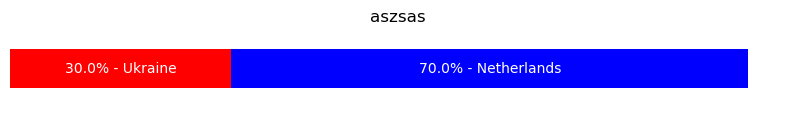

In [128]:
ax = pd.DataFrame({'a': [30, 70]}).T.plot.barh(stacked=True, figsize=(10, 1), color=['red', 'blue'])
ax.legend().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False);

for c, lb in zip(ax.containers, ['Ukraine', 'Netherlands']):
    ax.bar_label(c,
                 label_type='center',
                 labels=[f'{cc/100:.1%} - {lb}' for cc in c.datavalues],
                 #fmt='%.0f%%', 
                 color='white'
                );
    
fig = ax.get_figure()
ax.set_title("aszsas")

In [122]:
c.

TypeError: index expected at least 1 argument, got 0

In [41]:
import altair as alt
from altair import datum

In [42]:
small_df = pd.DataFrame({'Probability A':[0.2,0.8,0.4],'Probability B':[0.5,0.1,0.1],'Probability C':[0.3,0.1,0.5],'ID':['John','Sally','Frank']})


In [43]:
alt.Chart(small_df).mark_bar().transform_fold(
        ['Probability A','Probability B','Probability C']
    ).encode(
        x=alt.X('value:Q',scale=alt.Scale(domain=[0, 1])),
        y='ID:N',
        color=alt.Color('key:N',
            # arrange the column-colr pairs to you what you want
            scale=alt.Scale(
                domain=['Probability C','Probability A','Probability B'],
                range=['red', 'orange', 'green']
            )
        ),
        #order=alt.Order('value:Q',sort='descending'),
        #order=alt.Order('key:N',sort='descending'),
)


/Users/maksym/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [52]:
bars = alt.Chart(small_df).mark_bar().transform_fold(
        ['Probability A','Probability B','Probability C']
    ).encode(
        x=alt.X('value:Q',scale=alt.Scale(domain=[0, 1]), axis=None),
        y=alt.Y('ID:N', axis=None),
        color=alt.Color('key:N',
            # arrange the column-colr pairs to you what you want
            scale=alt.Scale(
                domain=['Probability C','Probability A','Probability B'],
                range=['red', 'orange', 'green']
            )
        )
        #order=alt.Order('value:Q',sort='descending'),
        #order=alt.Order('key:N',sort='descending'),
)

text = alt.Chart(small_df).mark_text(dx=-15, dy=3, color='white').encode(
        x=alt.X('value:Q',scale=alt.Scale(domain=[0, 1]), axis=None),
        y=alt.Y('ID:N', axis=None),
        detail='key:N',
        text=alt.Text('value:Q', format='.1f')
)


bars + text

/Users/maksym/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

In [190]:
data.pass_length

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3964          NaN
3965    25.649952
3966          NaN
3967          NaN
3968          NaN
Name: pass_length, Length: 3969, dtype: float64

In [191]:
data[~data.pass_length.isna()]

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.227,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:00.292,Pass,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:01.330,Pass,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:02.287,Pass,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:03.806,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:52.379,Pass,NaN
3955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:57.239,Pass,True
3959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:59.365,Pass,True
3961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:00.527,Pass,True


In [216]:
lineup = data.iloc[0:2, :].loc[:, ['team', 'tactics']].set_index('team').to_dict()['tactics']

In [218]:
data.iloc[0:2, :].loc[:, ['team', 'tactics']].set_index('team')

,tactics
team,
Netherlands,"{'formation': 3412, 'lineup': [{'player': {'id..."
Ukraine,"{'formation': 433, 'lineup': [{'player': {'id'..."


In [222]:
aaa = ast.literal_eval(tactics[1])['lineup'] + ast.literal_eval(tactics[0])['lineup']

In [225]:
{x['position']['name'] for x in aaa}

{'Center Attacking Midfield',
 'Center Back',
 'Center Defensive Midfield',
 'Center Forward',
 'Goalkeeper',
 'Left Back',
 'Left Center Back',
 'Left Center Forward',
 'Left Center Midfield',
 'Left Defensive Midfield',
 'Left Wing',
 'Left Wing Back',
 'Right Back',
 'Right Center Back',
 'Right Center Forward',
 'Right Center Midfield',
 'Right Defensive Midfield',
 'Right Wing',
 'Right Wing Back'}

In [224]:
aaa

[{'player': {'id': 22243, 'name': 'Heorhii Bushchan'},
  'position': {'id': 1, 'name': 'Goalkeeper'},
  'jersey_number': 1},
 {'player': {'id': 31900, 'name': 'Oleksandr Karavaev'},
  'position': {'id': 2, 'name': 'Right Back'},
  'jersey_number': 21},
 {'player': {'id': 39136, 'name': 'Illia Zabarnyi'},
  'position': {'id': 3, 'name': 'Right Center Back'},
  'jersey_number': 13},
 {'player': {'id': 18617, 'name': 'Mykola Matviyenko'},
  'position': {'id': 5, 'name': 'Left Center Back'},
  'jersey_number': 22},
 {'player': {'id': 20827, 'name': 'Vitalii Mykolenko'},
  'position': {'id': 6, 'name': 'Left Back'},
  'jersey_number': 16},
 {'player': {'id': 16514, 'name': 'Serhii Sydorchuk'},
  'position': {'id': 10, 'name': 'Center Defensive Midfield'},
  'jersey_number': 5},
 {'player': {'id': 16557, 'name': 'Ruslan Malinovskiy'},
  'position': {'id': 13, 'name': 'Right Center Midfield'},
  'jersey_number': 8},
 {'player': {'id': 3575, 'name': 'Oleksandr Zinchenko'},
  'position': {'id':

In [546]:
def draw_field(df_events, command1, command2):
    
    def plot_players(pitch, lineup, color, command, opposite=False, omit_players=0):
    
        COORDS = {
            'Goalkeeper': (5, 50),
            'Center Attacking Midfield': (37, 50),
            'Center Back': (17, 50),
            'Center Defensive Midfield': (32, 50),
            'Center Forward': (46, 50),
            'Left Back': (17, 83),
            'Left Center Back': (17, 67),
            'Left Center Forward': (45, 77),
            'Left Center Midfield': (32, 83),
            'Left Defensive Midfield': (32, 67),
            'Left Wing': (41, 17),
            'Left Wing Back': (23, 85),
            'Right Back': (17, 17),
            'Right Center Back': (17, 33),
            'Right Center Forward': (45, 23),
            'Right Center Midfield': (32, 17),
            'Right Defensive Midfield': (32, 33),
            'Right Wing': (41, 83),
            'Right Wing Back': (23, 15)
        }
        
        lineup_coords = [COORDS[x['position']['name']] for x in lineup]
        lineup_labels = [x['player']['name'] for x in lineup]
        
        for xy, t, lb in zip(lineup_coords, [str(x['jersey_number']) for x in lineup], lineup_labels):
            pitch.scatter(100 - xy[0] if opposite else xy[0], xy[1], s=300, c=color, label=f"{t} {lb}", ax=ax)
            pitch.annotate(xy=(100 - xy[0] - 0.15 - len(t) * 0.3 if opposite else xy[0] - 0.15 - len(t) * 0.3, xy[1] - 0.7), text=t, ax=ax)
            
        h, l = ax.get_legend_handles_labels()
        plt.rcParams['legend.title_fontsize'] = 20
        legend = plt.legend(h[omit_players:], 
                            l[omit_players:],
                            title=r"$\bf{" + command + "}$", edgecolor='#22312b',
                            facecolor='#22312b', labelcolor='#edede9', fontsize=15,
                            loc='upper right' if opposite else 'upper left', 
                            bbox_to_anchor=(1.38, 1) if opposite else (-0.38, 1),
                            borderaxespad=0.8
                           )
        legend.get_title().set_color('#edede9')
        ax.add_artist(legend)
        
    
    lineup = df_events.iloc[0:2, :].loc[:, ['team', 'tactics']].set_index('team').to_dict()['tactics']
    lineup = {k: ast.literal_eval(v) for k, v in lineup.items()}

    pitch = Pitch(pitch_type='opta', pitch_color='forestgreen', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 10), constrained_layout=True, tight_layout=False)
    fig.set_facecolor('#22312b')
    
    plt.subplots_adjust(right=1.4, left=1.4, top=1.4)
    
    plot_players(pitch, lineup[command1]['lineup'], 'orange', opposite=False, command=command1)
    plot_players(pitch, lineup[command2]['lineup'], 'dodgerblue', opposite=True, command=command2, 
                 omit_players=len(lineup[command1]['lineup']))

    ax.set_title(f'{command1} ({"-".join(str(lineup[command1]["formation"]))}) vs {command2} ({"-".join(str(lineup[command2]["formation"]))})',
                            fontsize=25, color='#edede9')
    

    return fig

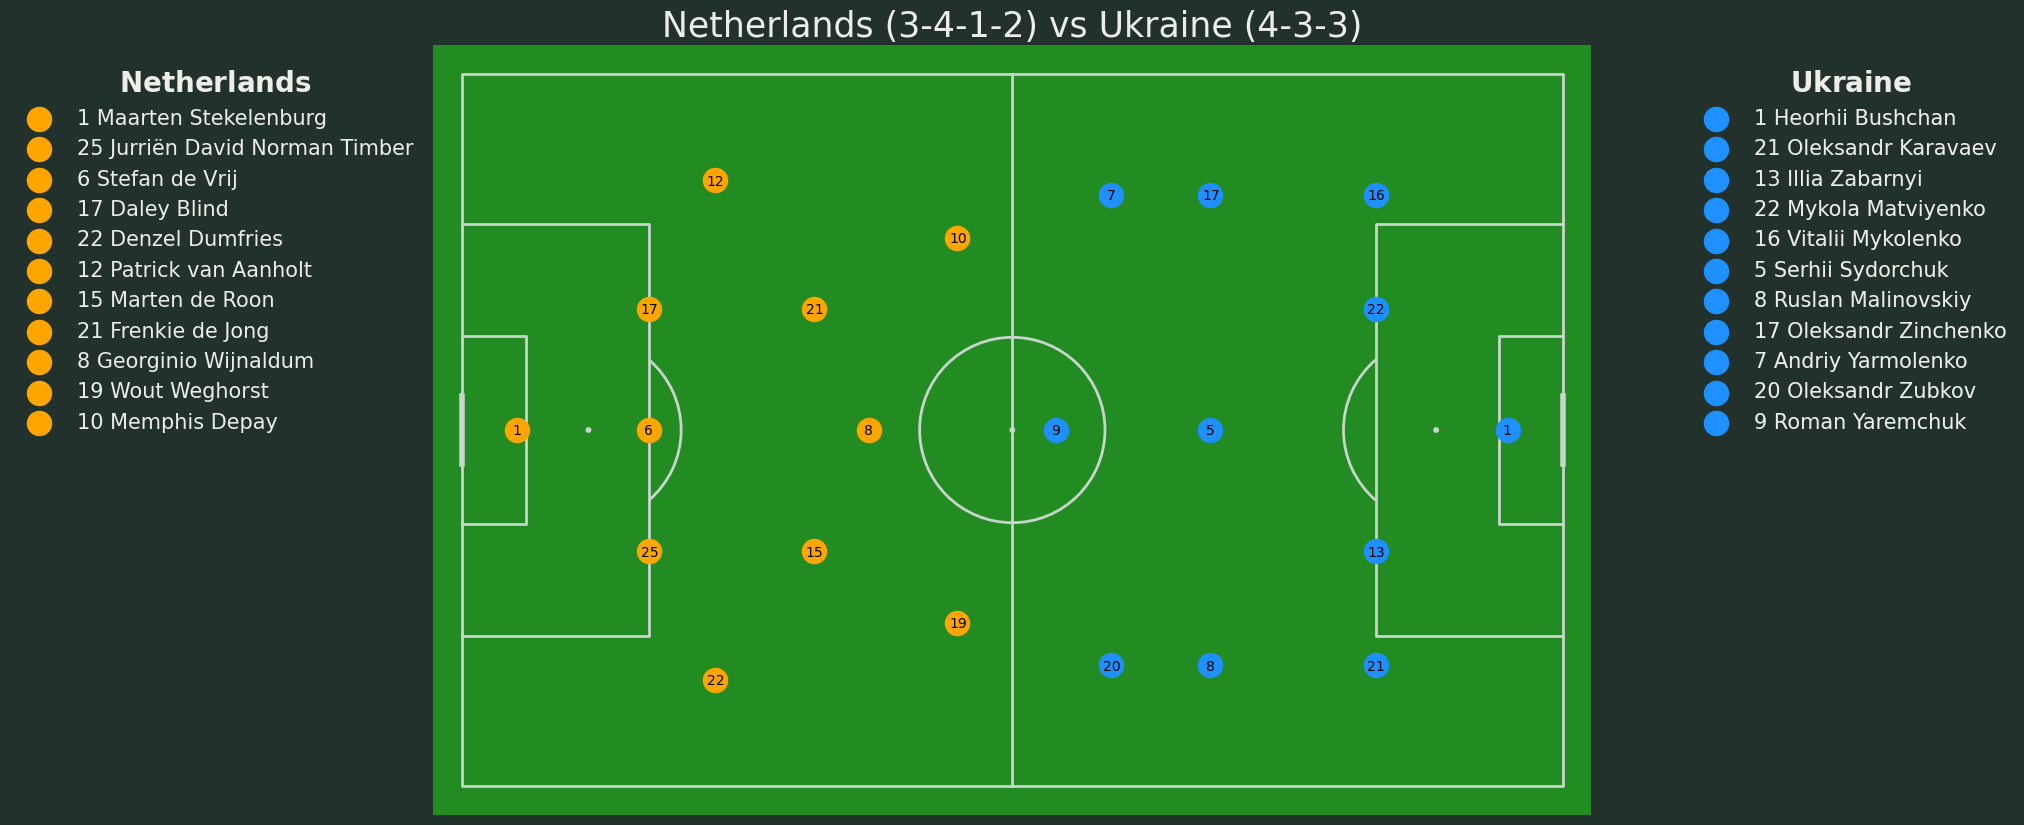

In [547]:
a = draw_field(data, 'Netherlands', 'Ukraine');

In [364]:
a

{'Netherlands': {'formation': 3412,
  'lineup': [{'player': {'id': 20201, 'name': 'Maarten Stekelenburg'},
    'position': {'id': 1, 'name': 'Goalkeeper'},
    'jersey_number': 1},
   {'player': {'id': 21809, 'name': 'Jurriën David Norman Timber'},
    'position': {'id': 3, 'name': 'Right Center Back'},
    'jersey_number': 25},
   {'player': {'id': 7787, 'name': 'Stefan de Vrij'},
    'position': {'id': 4, 'name': 'Center Back'},
    'jersey_number': 6},
   {'player': {'id': 3311, 'name': 'Daley Blind'},
    'position': {'id': 5, 'name': 'Left Center Back'},
    'jersey_number': 17},
   {'player': {'id': 8125, 'name': 'Denzel Dumfries'},
    'position': {'id': 7, 'name': 'Right Wing Back'},
    'jersey_number': 22},
   {'player': {'id': 3321, 'name': 'Patrick van Aanholt'},
    'position': {'id': 8, 'name': 'Left Wing Back'},
    'jersey_number': 12},
   {'player': {'id': 6994, 'name': 'Marten de Roon'},
    'position': {'id': 9, 'name': 'Right Defensive Midfield'},
    'jersey_number

In [548]:
data[data.type == 'Pass']

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.227,Pass,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:00.292,Pass,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:01.330,Pass,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:02.287,Pass,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:03.806,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:52.379,Pass,NaN
3955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:57.239,Pass,True
3959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:49:59.365,Pass,True
3961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:00.527,Pass,True


In [578]:
def describe_columns(data):
    for c in data.columns:
        print(f"{c:33} {sum(data[c].isna()) / data.shape[0]:10.2%} {data.shape[0] - data[c].isna().sum()} {len(data[c].unique()):5} {data[c].unique()[:5] if len(data[c].unique()) < 5 else ''}")

In [579]:
describe_columns(data[data.type == 'Pass'])

ball_receipt_outcome                 100.00% 0     1 [nan]
ball_recovery_recovery_failure       100.00% 0     1 [nan]
block_deflection                     100.00% 0     1 [nan]
carry_end_location                   100.00% 0     1 [nan]
clearance_aerial_won                 100.00% 0     1 [nan]
clearance_body_part                  100.00% 0     1 [nan]
clearance_head                       100.00% 0     1 [nan]
clearance_left_foot                  100.00% 0     1 [nan]
clearance_right_foot                 100.00% 0     1 [nan]
counterpress                          99.48% 6     2 [nan True]
dribble_nutmeg                       100.00% 0     1 [nan]
dribble_outcome                      100.00% 0     1 [nan]
dribble_overrun                      100.00% 0     1 [nan]
duel_outcome                         100.00% 0     1 [nan]
duel_type                            100.00% 0     1 [nan]
duration                               0.00% 1154  1144 
foul_committed_advantage             100.00% 0     1 

In [557]:
data_pass = data[data.type == 'Pass'].drop(columns=[ 
    "ball_receipt_outcome",
    "ball_recovery_recovery_failure",
    "block_deflection",
    "carry_end_location",
    "clearance_aerial_won",
    "clearance_body_part",
    "clearance_head",
    "clearance_left_foot",
    "clearance_right_foot",
    "dribble_nutmeg",          
    "dribble_outcome",         
    "dribble_overrun",        
    "duel_outcome",            
    "duel_type",               
    "foul_committed_advantage",
    "foul_committed_card",     
    "foul_committed_type",     
    "foul_won_advantage",      
    "foul_won_defensive",      
    "goalkeeper_body_part",    
    "goalkeeper_end_location", 
    "goalkeeper_outcome",      
    "goalkeeper_position",     
    "goalkeeper_technique",    
    "goalkeeper_type",
    "interception_outcome",
    "shot_aerial_won",          
    "shot_body_part",           
    "shot_end_location",        
    "shot_first_time",          
    "shot_freeze_frame",        
    "shot_key_pass_id",         
    "shot_outcome",             
    "shot_statsbomb_xg",        
    "shot_technique",           
    "shot_type",                
    "substitution_outcome",     
    "substitution_replacement", 
    "tactics"
])

In [580]:
describe_columns(data_pass)

counterpress                          99.48% 6     2 [nan True]
duration                               0.00% 1154  1144 
id                                     0.00% 1154  1154 
index                                  0.00% 1154  1154 
location                               0.00% 1154  1136 
match_id                               0.00% 1154     1 [3788746]
minute                                 0.00% 1154    91 
off_camera                            96.27% 43     2 [nan True]
out                                   99.91% 1     2 [nan True]
pass_aerial_won                       98.70% 15     2 [nan True]
pass_angle                             0.00% 1154  1116 
pass_assisted_shot_id                 98.44% 18    19 
pass_body_part                         3.99% 1108     7 
pass_cross                            98.35% 19     2 [nan True]
pass_cut_back                         99.74% 3     2 [nan True]
pass_deflected                        99.83% 2     2 [nan True]
pass_end_location            

In [570]:
data_pass.pass_recipient_id.value_counts().sum()

1125

In [569]:
data_pass.pass_recipient_id.isna().sum()

29

In [571]:
688+424

1112

In [572]:
617+360

977

In [573]:
data.pass_goal_assist.map(bool).sum()

3969

In [582]:
data.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'out', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_inswinging', 'pass_length',
       'pas

In [584]:
data.pass_length.sum() / 1000

22.0551070748

In [588]:
data[(data.minute > 50) & (data.minute < 55)]

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:06:19.065,Pass,NaN
595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:06:19.664,Pass,NaN
596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:06:19.664,Ball Receipt*,NaN
597,NaN,NaN,NaN,"[57.9, 1.3]",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:06:20.228,Carry,True
598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:06:20.228,Ball Receipt*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:09:49.480,Ball Receipt*,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:09:50.471,Pressure,NaN
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:09:50.562,Pressure,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Normal,Open Play,NaN,NaN,NaN,Netherlands,941,00:09:51.040,Shot,True


In [589]:
data[data.type == 'Goal Keeper']

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:01:38.053,Goal Keeper,NaN
401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:03:54.000,Goal Keeper,NaN
476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:04:50.976,Goal Keeper,NaN
489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:04:55.390,Goal Keeper,NaN
495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:04:58.270,Goal Keeper,NaN
545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:05:39.365,Goal Keeper,NaN
635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:06:42.059,Goal Keeper,NaN
645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:06:49.095,Goal Keeper,NaN
650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:06:51.280,Goal Keeper,NaN
711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:08:02.214,Goal Keeper,NaN


In [590]:
describe_columns(data[data.type == 'Goal Keeper'])

ball_receipt_outcome                 100.00% 0     1 [nan]
ball_recovery_recovery_failure       100.00% 0     1 [nan]
block_deflection                     100.00% 0     1 [nan]
carry_end_location                   100.00% 0     1 [nan]
clearance_aerial_won                 100.00% 0     1 [nan]
clearance_body_part                  100.00% 0     1 [nan]
clearance_head                       100.00% 0     1 [nan]
clearance_left_foot                  100.00% 0     1 [nan]
clearance_right_foot                 100.00% 0     1 [nan]
counterpress                         100.00% 0     1 [nan]
dribble_nutmeg                       100.00% 0     1 [nan]
dribble_outcome                      100.00% 0     1 [nan]
dribble_overrun                      100.00% 0     1 [nan]
duel_outcome                         100.00% 0     1 [nan]
duel_type                            100.00% 0     1 [nan]
duration                               0.00% 25     1 [0.]
foul_committed_advantage             100.00% 0     1 [na

In [594]:
data.goalkeeper_type.value_counts()

goalkeeper_type
Shot Faced        10
Shot Saved         7
Goal Conceded      5
Collected          1
Smother            1
Keeper Sweeper     1
Name: count, dtype: int64

In [610]:
cc = pd.pivot_table(
    data,
    values='id',
    index='team',
    columns='goalkeeper_type',
    aggfunc='count')

In [609]:
cc.sum(axis=1)

team
Netherlands     8.0
Ukraine        17.0
dtype: float64

In [612]:
cc.index = [{'Ukraine': 'Netherlands', 'Netherlands': 'Ukraine'}[i] for i in cc.index]

In [613]:
cc

goalkeeper_type,Collected,Goal Conceded,Keeper Sweeper,Shot Faced,Shot Saved,Smother
Ukraine,NaN,2.0,1.0,2.0,3.0,NaN
Netherlands,1.0,3.0,NaN,8.0,4.0,1.0


In [600]:
[i for i in cc.index]

['Ukraine', 'Netherlands']

In [614]:
pd.pivot_table(
    data,
    values='id',
    index='team',
    columns='duel_type',
    aggfunc='count')

duel_type,Aerial Lost,Tackle
team,,
Netherlands,9,12
Ukraine,11,23


In [615]:
data[~data.duel_type.isna()]

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:18.203,Duel,True
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:00:59.351,Duel,True
225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:01:59.610,Duel,True
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:02:56.091,Duel,True
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:03:53.602,Duel,True
416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:04:23.691,Duel,True
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:04:31.421,Duel,True
463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:04:48.224,Duel,True
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:05:18.267,Duel,True
567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:05:52.035,Duel,True


In [616]:
describe_columns(data[~data.duel_type.isna()])

ball_receipt_outcome                 100.00% 0     1 [nan]
ball_recovery_recovery_failure       100.00% 0     1 [nan]
block_deflection                     100.00% 0     1 [nan]
carry_end_location                   100.00% 0     1 [nan]
clearance_aerial_won                 100.00% 0     1 [nan]
clearance_body_part                  100.00% 0     1 [nan]
clearance_head                       100.00% 0     1 [nan]
clearance_left_foot                  100.00% 0     1 [nan]
clearance_right_foot                 100.00% 0     1 [nan]
counterpress                          65.45% 19     2 [True nan]
dribble_nutmeg                       100.00% 0     1 [nan]
dribble_outcome                      100.00% 0     1 [nan]
dribble_overrun                      100.00% 0     1 [nan]
duel_outcome                          36.36% 35     5 
duel_type                              0.00% 55     2 ['Tackle' 'Aerial Lost']
duration                               0.00% 55     1 [0.]
foul_committed_advantage          

In [619]:
data[~data.duel_type.isna()].play_pattern

50        Regular Play
124      From Throw In
225     From Goal Kick
333     From Goal Kick
400        From Corner
416     From Free Kick
432     From Goal Kick
463       Regular Play
499     From Free Kick
567       Regular Play
656     From Goal Kick
727       Regular Play
811      From Throw In
922       Regular Play
1058      Regular Play
1172      Regular Play
1239    From Free Kick
1446    From Free Kick
1460     From Throw In
1467     From Throw In
1791      Regular Play
1800      Regular Play
1826      Regular Play
1863      Regular Play
1871      Regular Play
1954    From Free Kick
2072     From Throw In
2075      Regular Play
2108      Regular Play
2198      Regular Play
2210      Regular Play
2251      Regular Play
2281       From Keeper
2303      Regular Play
2305      Regular Play
2324      Regular Play
2476      Regular Play
2579      Regular Play
2613      Regular Play
2766      Regular Play
2814      Regular Play
3077    From Goal Kick
3226    From Free Kick
3321    Fro

In [624]:
data[data.type == 'Foul Committed']

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:03:40.720,Foul Committed,NaN
471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:04:49.984,Foul Committed,NaN
745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:08:15.579,Foul Committed,NaN
1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:13:23.546,Foul Committed,NaN
1313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:15:31.755,Foul Committed,NaN
1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:16:21.155,Foul Committed,NaN
1669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:20:23.781,Foul Committed,NaN
1718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:20:53.989,Foul Committed,NaN
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:22:31.879,Foul Committed,NaN
1927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Ukraine,911,00:23:30.370,Foul Committed,NaN
